# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [8]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 582


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key + "&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | iqaluit
Processing Record 2 of Set 1 | malango
Processing Record 3 of Set 1 | badger
Processing Record 4 of Set 1 | fernie
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | oban
Processing Record 8 of Set 1 | ust-nera
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | hami
Processing Record 11 of Set 1 | al kharj
Processing Record 12 of Set 1 | west island
Processing Record 13 of Set 1 | wailua homesteads
Processing Record 14 of Set 1 | sao joao da barra
Processing Record 15 of Set 1 | rocha
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | grytviken
Processing Record 18 of Set 1 | tura
Processing Record 19 of Set 1 | cargados carajos
City not found. Skipping...
Processing Record 20 of Set 1 | port saint john's
Processing Record 21 of Set 1 | punta arenas
Processing Record 22 of Set 1 | m

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,iqaluit,63.7506,-68.5145,-25.73,62,40,3.09,CA,1734472242
1,malango,-2.9627,119.9001,18.33,95,93,1.59,ID,1734472244
2,badger,64.8000,-147.5333,-19.07,80,75,3.09,US,1734472245
3,fernie,49.5000,-115.0687,-3.19,94,100,1.53,CA,1734472246
4,albany,42.6001,-73.9662,7.58,69,87,0.45,US,1734472248


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,-25.73,62,40,3.09,CA,1734472242
1,malango,-2.9627,119.9001,18.33,95,93,1.59,ID,1734472244
2,badger,64.8000,-147.5333,-19.07,80,75,3.09,US,1734472245
3,fernie,49.5000,-115.0687,-3.19,94,100,1.53,CA,1734472246
4,albany,42.6001,-73.9662,7.58,69,87,0.45,US,1734472248


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

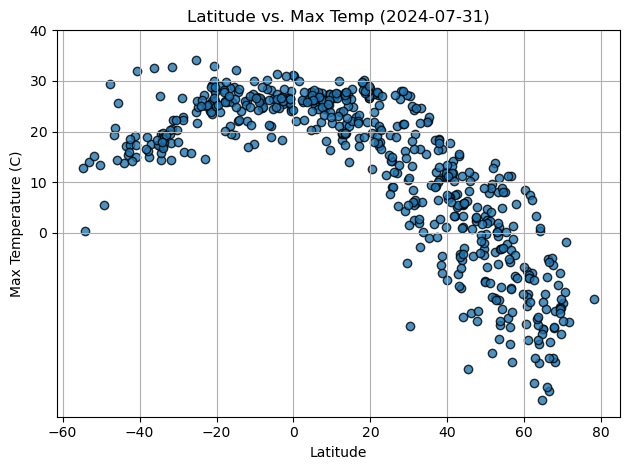

In [14]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", linewidths=1, marker="o", alpha=0.8)
plt.title("Latitude vs. Max Temp (2024-07-31)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xticks(np.arange(-60, 100, step=20))
plt.yticks(np.arange(0, max(city_data_df["Max Temp"])+10, step=10))
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

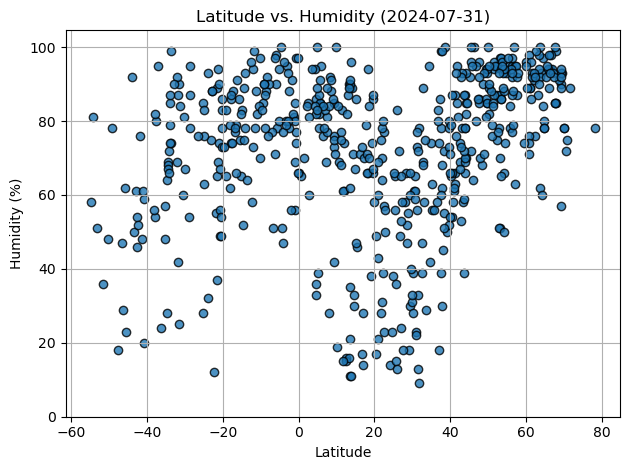

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", linewidths=1, marker="o", alpha=0.8)
plt.title("Latitude vs. Humidity (2024-07-31)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Incorporate the other graph properties
plt.xticks(np.arange(-60, 100, step=20))
plt.yticks(np.arange(0, max(city_data_df["Humidity"])+10, step=20))

plt.tight_layout()
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

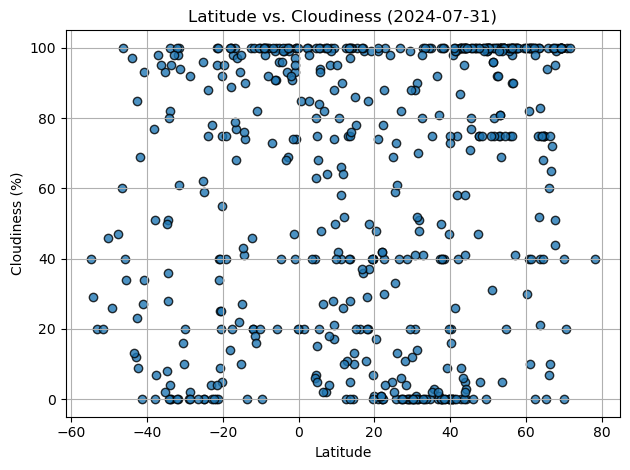

In [16]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", linewidths=1, marker="o", alpha=0.8)
plt.title("Latitude vs. Cloudiness (2024-07-31)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xticks(np.arange(-60, 100, step=20))
plt.yticks(np.arange(0, max(city_data_df["Cloudiness"])+10, step=20))
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

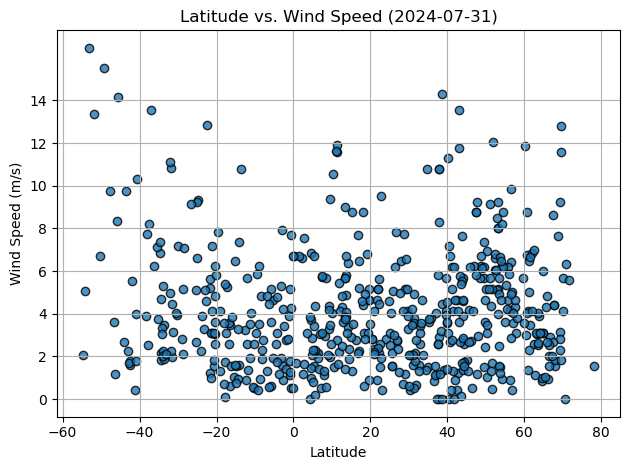

In [17]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", linewidths=1, marker="o", alpha=0.8)
plt.title("Latitude vs. Wind Speed (2024-07-31)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xticks(np.arange(-60, 100, step=20))
plt.yticks(np.arange(0, 16, step=2))
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [18]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def plot_linear_regression(x_values, y_values, title, text_coordinates, ylabel, plot_filename):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    r_squared = rvalue**2
    print(f"The r^2 value is: {r_squared}")
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(ylabel)
    # plt.grid(True)
    plt.savefig(plot_filename)
    plt.show()
    
    # print(f"The r^2 value is: {r_squared:.f}")

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,-25.73,62,40,3.09,CA,1734472242
2,badger,64.8000,-147.5333,-19.07,80,75,3.09,US,1734472245
3,fernie,49.5000,-115.0687,-3.19,94,100,1.53,CA,1734472246
4,albany,42.6001,-73.9662,7.58,69,87,0.45,US,1734472248
6,oban,56.4127,-5.4706,11.24,92,100,9.85,GB,1734472250


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,malango,-2.9627,119.9001,18.33,95,93,1.59,ID,1734472244
5,port-aux-francais,-49.3500,70.2167,5.51,78,26,15.50,TF,1734472249
8,waitangi,-43.9535,-176.5597,13.79,92,97,2.68,NZ,1734472253
11,west island,-12.1568,96.8225,25.99,94,20,2.57,CC,1734472257
13,sao joao da barra,-21.6403,-41.0511,25.05,89,100,5.65,BR,1734472259


###  Temperature vs. Latitude Linear Regression Plot

The r^2 value is: 0.7387196586995349


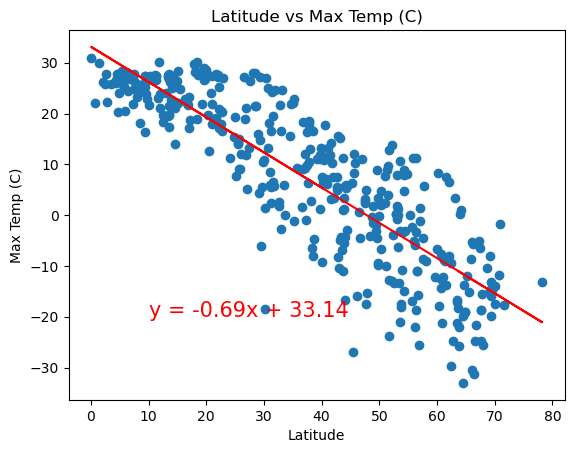

In [21]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values,"Latitude vs Max Temp (C)", (10, -20), "Max Temp (C)", "output_data/fig5.png")

The r^2 value is: 0.3822141383491482


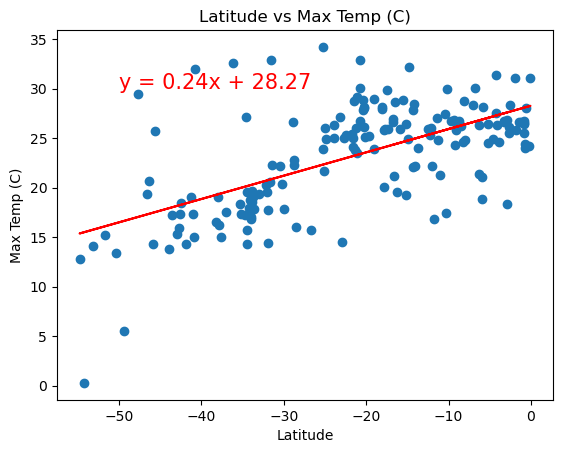

In [22]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude vs Max Temp (C)", (-50, 30), "Max Temp (C)", "output_data/Fig6.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2 value is: 0.155041507387803


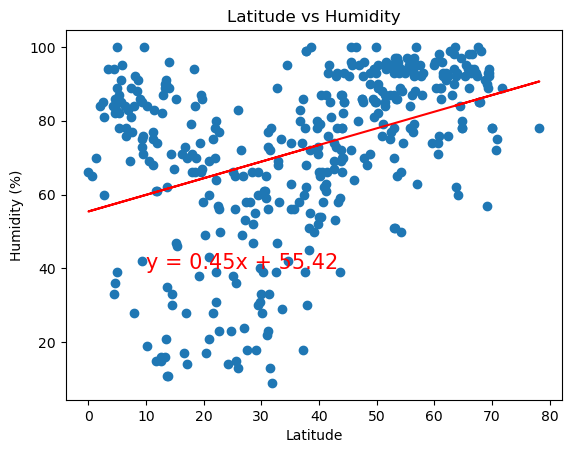

In [23]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Latitude vs Humidity", (10, 40), "Humidity (%)", "output_data/Fig7.png")


The r^2 value is: 0.19659596752257585


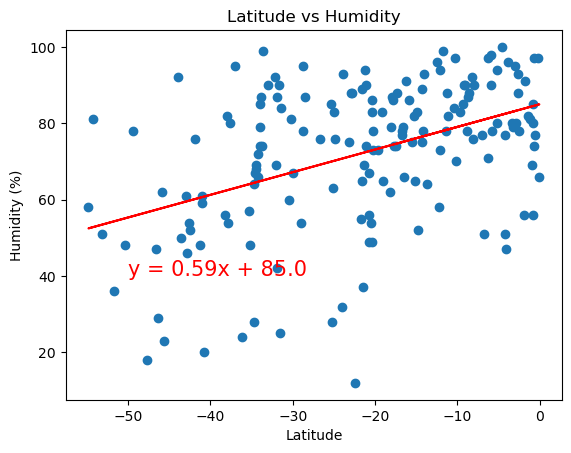

In [24]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Latitude vs Humidity", (-50, 40), "Humidity (%)", "output_data/Fig8.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2 value is: 0.07415430922451845


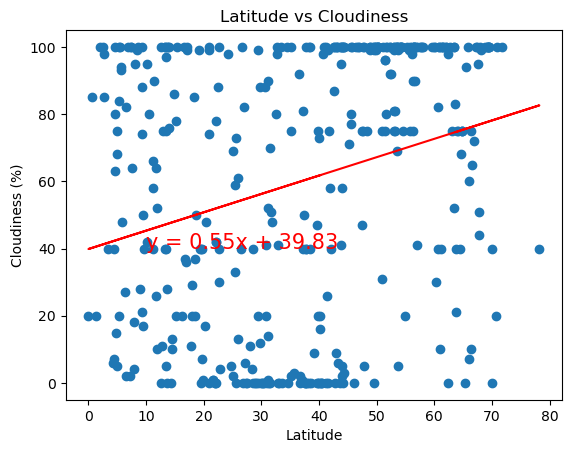

In [25]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Latitude vs Cloudiness", (10, 40), "Cloudiness (%)", "output_data/Fig9.png")

The r^2 value is: 0.14473568718845375


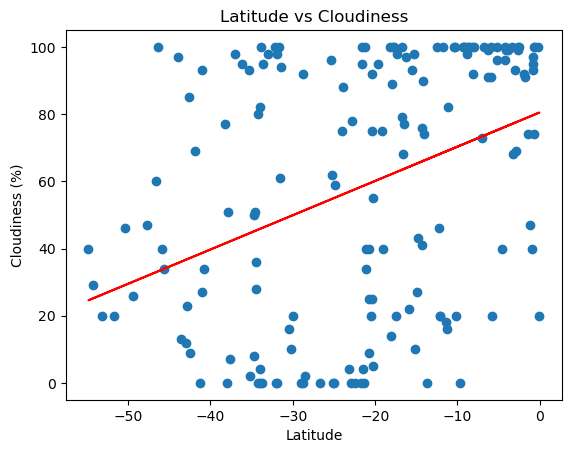

In [26]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Latitude vs Cloudiness", (10, 40), "Cloudiness (%)", "output_data/Fig10.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2 value is: 0.009969023789657182


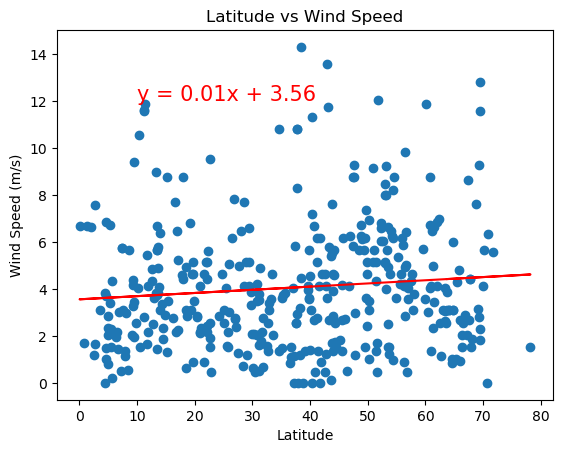

In [27]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Latitude vs Wind Speed", (10, 12), "Wind Speed (m/s)", "output_data/Fig11.png")

The r^2 value is: 0.13903687851188612


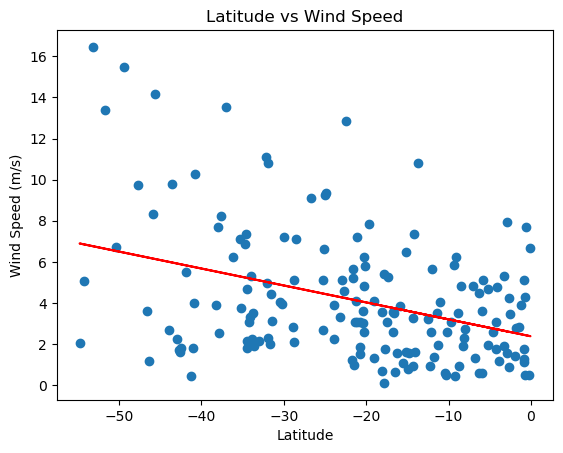

In [28]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Latitude vs Wind Speed", (10, 12), "Wind Speed (m/s)", "output_data/Fig12.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE